In [2]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde import KDE
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin
from kdelearn.metrics import pi_kf
from sklearn.datasets import make_moons

In [4]:
x1_min, x1_max = -3, 3
x2_min, x2_max = -3, 3
grid_size = 100

x1 = np.linspace(x1_min, x1_max, grid_size)
x2 = np.linspace(x2_min, x2_max, grid_size)
x1v, x2v = np.meshgrid(x1, x2)
x1p = x1v.reshape(-1, 1)
x2p = x2v.reshape(-1, 1)
x_grid = np.hstack((x1p, x2p))


m_train = 1000
n = 2
x_train = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], m_train)

In [5]:
bandwidth1 = direct_plugin(x_train)
bandwidth2 = n**(1/(n+4)) * bandwidth1 ** (5/(n+4))

In [6]:
kde1 = KDE().fit(x_train, bandwidth=bandwidth1)
kde2 = KDE().fit(x_train, bandwidth=bandwidth2)

scores1 = kde1.pdf(x_grid)
scores2 = kde2.pdf(x_grid)

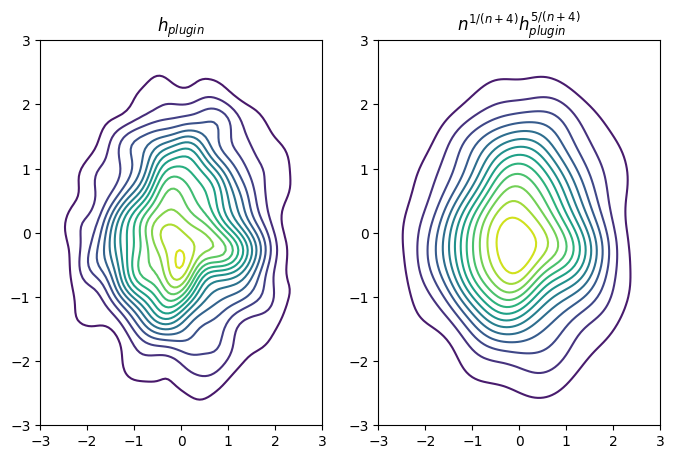

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

axs[0].set_title("$h_{plugin}$")
axs[0].contour(x1v, x2v, scores1.reshape(grid_size, grid_size), 15)

axs[1].set_title("$n^{1/(n+4)} h_{plugin}^{5/(n+4)}$")
axs[1].contour(x1v, x2v, scores2.reshape(grid_size, grid_size), 15)

plt.show()

In [18]:
print(f"h_left: {bandwidth1}")

h_left: [0.26552658 0.2474416 ]


In [20]:
print(f"h_right: {bandwidth2}")

h_right: [0.37175916 0.3505357 ]
